---
<h1><center>Lesson 3.1 - Basic intro to Visualization with Python</center></h1>
---

<center><h1>Part 2. Matplotlib</h1></center>
---

In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. More about that later. 
%matplotlib inline

To get started with matplotlib import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [2]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np

# Table of Contents

- [First plot](#First-plot)
- [Manipulation by disposition of plots - subplots](#Manipulation-by-disposition-of-plots---subplots)
- [Figure size, aspect ratio and DPI](#Figure-size,-aspect-ratio-and-DPI)
- [Saving figures](#Saving-figures)
- [Legends, labels and titles](#Legends,-labels-and-titles)
- [Formatting text: LaTeX, fontsize, font family](#Formatting-text:-LaTeX,-fontsize,-font-family)
- [Setting colors, linewidths, linetypes](#Setting-colors,-linewidths,-linetypes)
    - [*Exercise 2.1*](#Exercise-2.1)
- [Control over axis appearance](#Control-over-axis-appearance)
- [Placement of ticks and custom tick labels](#Placement-of-ticks-and-custom-tick-labels)
- [Axis number and axis label spacing](#Axis-number-and-axis-label-spacing)
- [Axis grid](#Axis-grid)
- [Axis spines](#Axis-spines)
- [Twin axes](#Twin-axes)
- [Axes where `x` and `y` is zero](#Axes-where-x-and-y-is-zero)
- [Other 2D plot styles](#Other-2D-plot-styles)
- [Text annotation](#Text-annotation)
    - [*Exercise 2.2*](#Exercise-2.2)
- [Colormap and contour figures](#Colormap-and-contour-figures)
- [3D figures](#3D-figures)

---


### First plot

[[back to top]](#Table-of-Contents)

To create a simple line `matplotlib` plot you need to set two arrays for `x` and `y` coordinates of drawing points and them call the `plt.plot()` function:

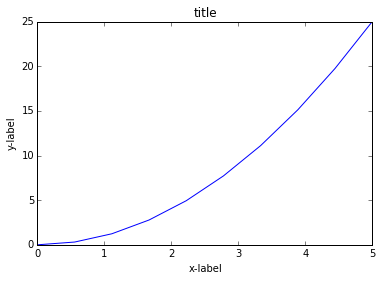

In [3]:
# Set array of points coordinates
x = np.linspace(0, 5, 10)
y = x ** 2

# Create a container for all plot elements (axes, text labels, legend, etc.) 
# It's not required in IPython notebook after calling `%matplotlib inline` command
plt.figure()

# Draw the line
plt.plot(x, y)

# Add labels to x and y axes
plt.xlabel('x-label')
plt.ylabel('y-label')

# Add title to the plot
plt.title('title')

# Display the plot
plt.show()

### Manipulation by disposition of plots - subplots

[[back to top]](#Table-of-Contents)

The main idea with object-oriented programming is to have objects that one can apply functions and actions on, and no object or program states should be global. The real advantage of this approach becomes apparent when more than one figure is created, or when a figure contains more than one subplot. 

To use the object-oriented API we start out very much like in the previous example, but instead of creating a new global figure instance we store a reference to the newly created figure instance in the `fig` variable, and from it we create a new axis instance `axes` using the `add_axes` method in the `Figure` class instance `fig`:

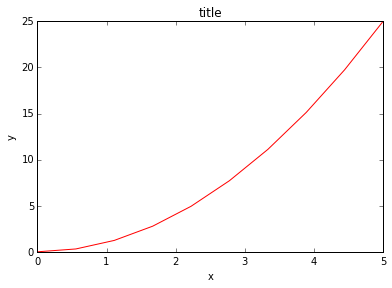

In [4]:
fig = plt.figure()

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

axes.plot(x, y, 'r')   # 'r' corresponds to red color of line

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

Although a little bit more code is involved, the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

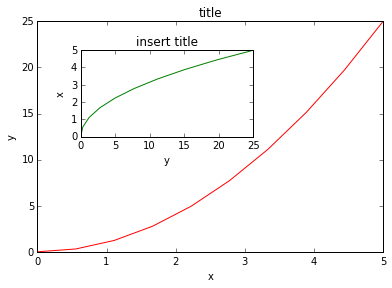

In [5]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, y, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(y, x, 'g')   # 'g' = green line
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title')

If we don't care about being explicit about where our plot axes are placed in the figure canvas, then we can use one of the many axis layout managers in matplotlib. My favorite is `subplots`, which can be used like this:

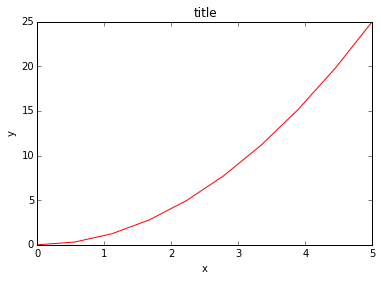

In [6]:
fig, axes = plt.subplots()

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

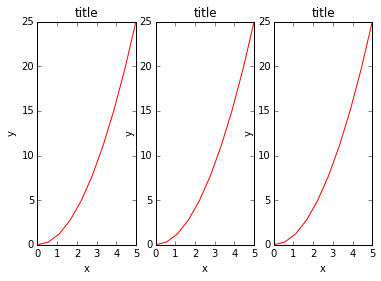

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3)

for ax in axes:
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

That was easy, but it isn't so pretty with overlapping figure axes and labels, right?

We can deal with that by using the `fig.tight_layout` method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content. Moreover, the size of figure is fixed by default, i.e. it does not change depending on the subplots amount on the figure. 

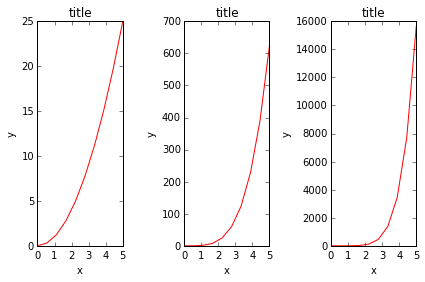

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3)

for i, ax in enumerate(axes):
    ax.plot(x, y**(i+1), 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    
fig.tight_layout()

Above set of plots can be obtained also using `add_subplot` method of `figure` object.

/usr/lib/python2.7/dist-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


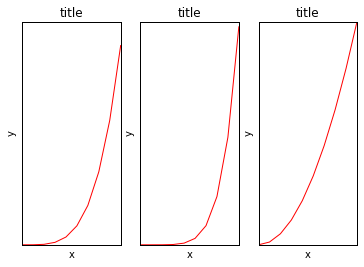

In [9]:
fig = plt.figure()

for i in range(3):
    ax = fig.add_subplot(1, 3, i)   # (rows amount, columns amount, subplot number)
    ax.plot(x, y**(i+1), 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')
    # clear x and y ticks
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

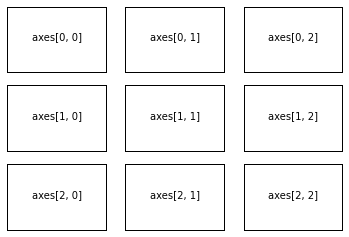

In [10]:
ncols, nrows = 3, 3

fig, axes = plt.subplots(nrows, ncols)

for m in range(nrows):
    for n in range(ncols):
        axes[m, n].set_xticks([])
        axes[m, n].set_yticks([])
        axes[m, n].text(0.5, 0.5, "axes[{}, {}]".format(m, n),
                        horizontalalignment='center')

`subplot2grid` is a helper function that is similar to `plt.subplot` but uses 0-based indexing and let subplot to occupy multiple cells. Let's to see how it works.

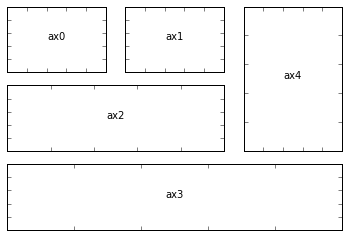

In [11]:
fig = plt.figure()

# Let's remove all labels  on the axes
def clear_ticklabels(ax):
    ax.set_yticklabels([])
    ax.set_xticklabels([])

ax0 = plt.subplot2grid((3, 3), (0, 0))
ax1 = plt.subplot2grid((3, 3), (0, 1))
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax3 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
ax4 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)

axes = (ax0, ax1, ax2, ax3, ax4)
# Add all sublots
[ax.text(0.5, 0.5, "ax{}".format(n), horizontalalignment='center') for n, ax in enumerate(axes)]
# Cleare labels on axes
[clear_ticklabels(ax) for ax in axes]
plt.show()

### Figure size, aspect ratio and DPI

[[back to top]](#Table-of-Contents)

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the `Figure` object is created, using the `figsize` and `dpi` keyword arguments. `figsize` is a tuple of the width and height of the figure in inches, and `dpi` is the dots-per-inch (pixel per inch). To create an 800x400 pixel, 100 dots-per-inch figure, we can do: 

In [12]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to layout managers, such as the `subplots` function:

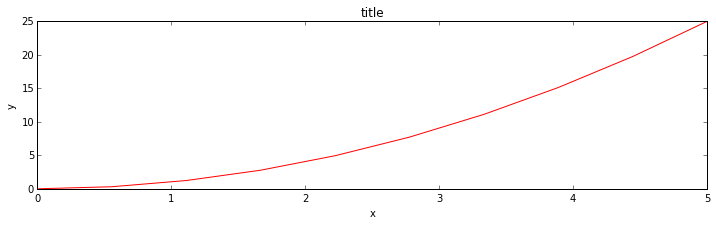

In [13]:
fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

### Saving figures

[[back to top]](#Table-of-Contents)

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [14]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [15]:
fig.savefig("filename.png", dpi=200)

#### What formats are available and which ones should be used for best quality?

Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. For scientific papers, I recommend using PDF whenever possible. (LaTeX documents compiled with `pdflatex` can include PDFs using the `includegraphics` command). In some cases, PGF can also be good alternative.

### Legends, labels and titles

[[back to top]](#Table-of-Contents)

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

    ax.set_title("title")
    
**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    
**Legends**

Legends for curves in a figure can be added in two ways. One method is to use the `legend` method of the axis object and pass a list/tuple of legend texts for the previously defined curves:

    ax.legend(["curve1", "curve2", "curve3"])
    
A better method is to use the label="label text" keyword argument when plots or other objects are added to the figure, and then using the legend method without arguments to add the legend to the figure:

    ax.plot(x, x**2, label="curve1")
    ax.plot(x, x**3, label="curve2")
    ax.legend()    
    
The advantage with this method is that if curves are added or removed from the figure, the legend is automatically updated accordingly.

The following figure shows how to use the figure title, axis labels and legends described above:

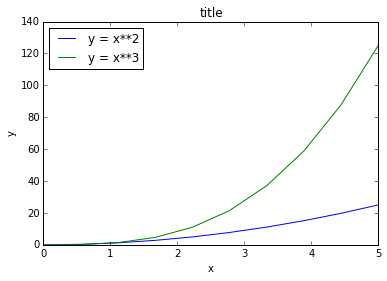

In [16]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="y = x**2")
ax.plot(x, x**3, label="y = x**3")
ax.legend(loc=2); # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title');

The `legend` function takes an optional keyword argument `loc` that can be used to specify where in the figure the legend is to be drawn. The allowed values of `loc` are numerical codes for the various places the legend can be drawn. See the [link](http://matplotlib.org/users/legend_guide.html#legend-location) for details. Some of the most common `loc` values are:

    ax.legend(loc=0) # let matplotlib decide the optimal location
    ax.legend(loc=1) # upper right corner
    ax.legend(loc=2) # upper left corner
    ax.legend(loc=3) # lower left corner
    ax.legend(loc=4) # lower right corner

... many more options are available

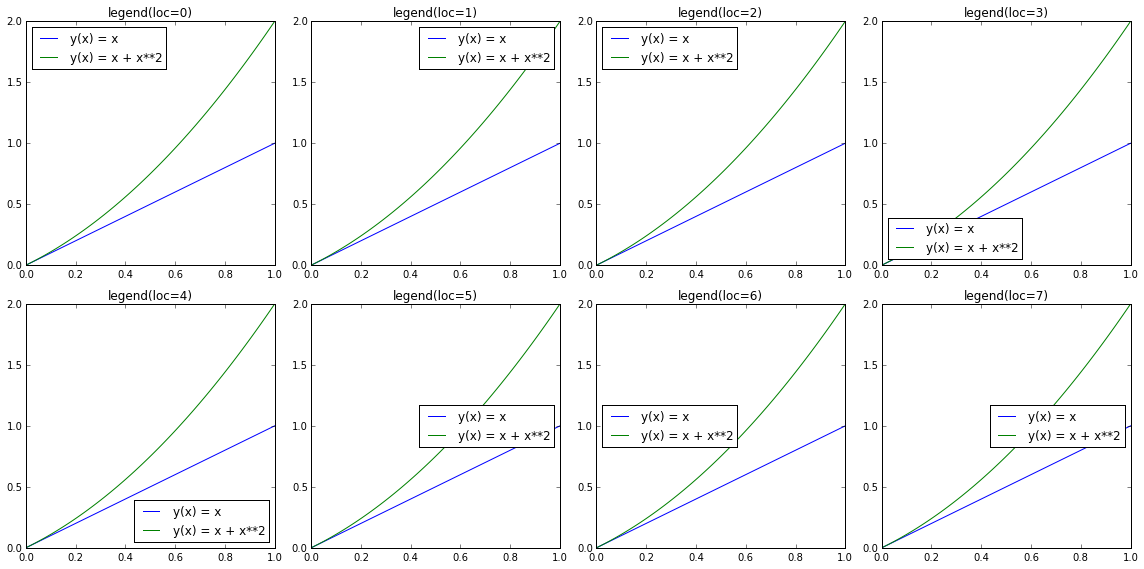

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

x = np.linspace(0, 1, 100)

for m in range(2):
    for n in range(4):
        axes[m, n].plot(x, x, label="y(x) = x")
        axes[m, n].plot(x, x + x**2, label="y(x) = x + x**2")
        axes[m, n].legend(loc=4*m+n)
        axes[m, n].set_title("legend(loc={})".format(4*m+n))

fig.tight_layout()

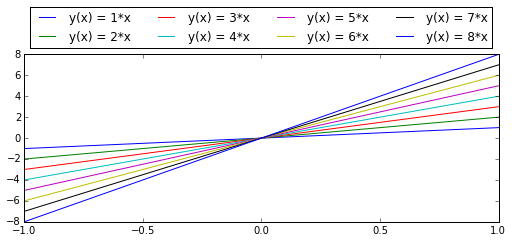

In [18]:
# We can also specify the area for legend
fig, ax = plt.subplots(1, 1, figsize=(8.5, 3))

x = np.linspace(-1, 1, 100)

for n in range(1, 9):
    ax.plot(x, n * x, label="y(x) = {}*x".format(n))

ax.legend(ncol=4, loc=3, bbox_to_anchor=(0, 1), fontsize=12)
plt.show()

### Formatting text: LaTeX, fontsize, font family

[[back to top]](#Table-of-Contents)

The figure above is functional, but it does not (yet) satisfy the criteria for a figure used in a publication. First and foremost, we need to have LaTeX formatted text, and second, we need to be able to adjust the font size to appear right in a publication.

Matplotlib has great support for LaTeX. All we need to do is to use dollar signs encapsulate LaTeX in any text (legend, title, label, etc.). For example, `"$y=x^3$"`.

But here we can run into a slightly subtle problem with LaTeX code and Python text strings. In LaTeX, we frequently use the backslash in commands, for example `\alpha` to produce the symbol $\alpha$. But the backslash already has a meaning in Python strings (the escape code character). To avoid Python messing up our latex code, we need to use "raw" text strings. Raw text strings are prepended with an '`r`', like `r"\alpha"` or `r'\alpha'` instead of `"\alpha"` or `'\alpha'`:

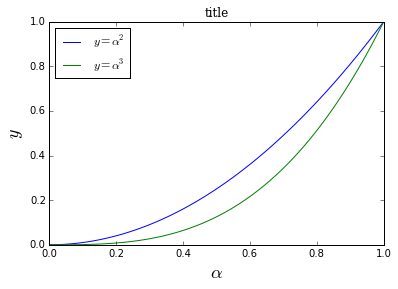

In [19]:
fig, ax = plt.subplots()

x = np.linspace(0, 1, 100)

ax.plot(x, x**2, label=r"$y = \alpha^2$")
ax.plot(x, x**3, label=r"$y = \alpha^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel(r'$\alpha$', fontsize=18)
ax.set_ylabel(r'$y$', fontsize=18)
ax.set_title('title', family='serif')

plt.show()

### Setting colors, linewidths, linetypes

[[back to top]](#Table-of-Contents)

#### Colors

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc.:

    ax.plot(x, x**2, 'b.-') # blue line with dots
    ax.plot(x, x**3, 'g--') # green dashed line
    
We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments:

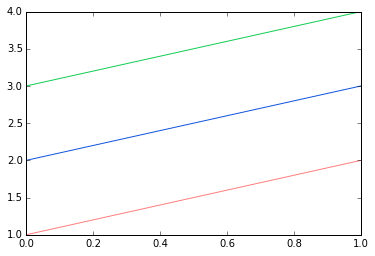

In [20]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="red", alpha=0.5) # half-transparant red
ax.plot(x, x+2, color="#1155dd")        # RGB hex code for a bluish color
ax.plot(x, x+3, color="#15cc55")        # RGB hex code for a greenish color

plt.show()

Matplotlib contains the list of default colors in `colors` module. Let's look at them 

In [21]:
from matplotlib import colors
from IPython.core.display import HTML, display
     
for key, val in colors.cnames.iteritems():
    display(
        HTML(
            """
            <div style="display: inline-block">
                <div style='width: 40px; height: 20px; background-color: {}; float: left;'></div>
                <span style='margin-left: 40px;'>{}</span>
            </div>
            """ \
            .format(val, key)
        )
    )

#### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

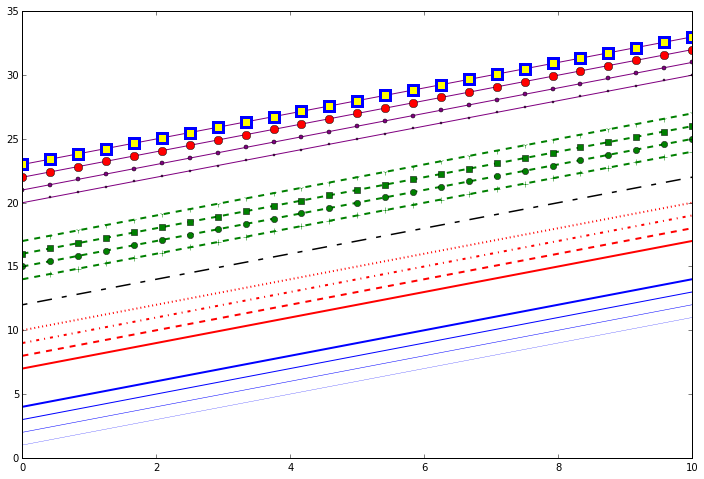

In [22]:
fig, ax = plt.subplots(figsize=(12,8))

x = np.linspace(0, 10, 25)

# Various width of lines
ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# Possible linestype options ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+ 7, color="red", lw=2, linestyle='-')
ax.plot(x, x+ 8, color="red", lw=2, ls='--')
ax.plot(x, x+ 9,color="red", lw=2, ls='-.')
ax.plot(x, x+10, color="red", lw=2, ls=':')

# Custom dash
line, = ax.plot(x, x+12, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# Possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+14, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+15, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+16, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+17, color="green", lw=2, ls='--', marker='1')

# Marker size and color
ax.plot(x, x+20, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+21, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+22, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+23, color="purple", lw=1, ls='-', marker='s', markersize=10, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="blue");

Available unfilled markers:
{0: u'tickleft', 1: u'tickright', 2: u'tickup', 3: u'tickdown', 4: u'caretleft', u'D': u'diamond', 6: u'caretup', 7: u'caretdown', u's': u'square', u'|': u'vline', u'': u'nothing', u'None': u'nothing', u'x': u'x', 5: u'caretright', u'_': u'hline', u'^': u'triangle_up', u' ': u'nothing', u'd': u'thin_diamond', u'h': u'hexagon1', u'+': u'plus', u'*': u'star', u',': u'pixel', u'o': u'circle', u'.': u'point', u'1': u'tri_down', u'p': u'pentagon', u'3': u'tri_left', u'2': u'tri_up', None: u'nothing', u'4': u'tri_right', u'H': u'hexagon2', u'v': u'triangle_down', u'8': u'octagon', u'<': u'triangle_left', u'>': u'triangle_right'}
Available filled markers:
(u'o', u'v', u'^', u'<', u'>', u'8', u's', u'p', u'*', u'h', u'H', u'D', u'd')


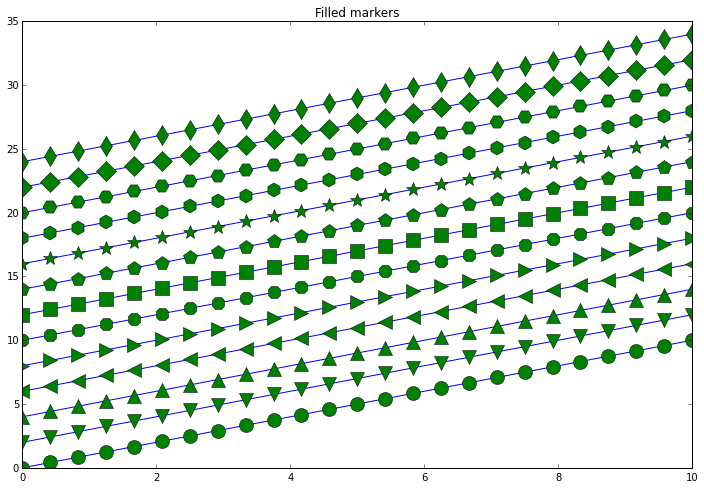

In [23]:
from matplotlib.lines import Line2D

print "Available unfilled markers:\n", Line2D.markers
print "Available filled markers:\n", Line2D.filled_markers

fig, ax = plt.subplots(figsize=(12,8))

for i, m in enumerate(Line2D.filled_markers):
    ax.plot(x, x+2*i, color="blue", lw=1, ls='-', marker=m, markersize=14, markerfacecolor="green")

plt.title ("Filled markers")
plt.show()

> ### Exercise 2.1:

> Often in Data Science field we need to predict some values based on the so called train dataset. The curve interpolation is one type of such prediction algorithms and rules. It consists in the building of the function that will caclucate the `y` value by the `x` based on some dataset of initial `x` array. 

> Python [SciPy](https://www.scipy.org/) library provides module `interpolate` to work with curve interpolation. Particularly, the function [`scipy.interpolate.interp1d(x, y)`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d) allows to approximate some function based on some train dataset of `x` and `y` values.

> Let's look an example.

> <span style="margin-left: 30px"></span>`from scipy import interpolate`<br></br>

> <span style="margin-left: 30px"></span><code style="color: darkblue"># Create the array of points</code><br></br>
> <span style="margin-left: 30px"></span>`x = np.linspace(-2, 2, 25)`<br></br>
> <span style="margin-left: 30px"></span><code style="color: darkblue"># Choise such function</code><br></br>
> <span style="margin-left: 30px"></span>`y = x**4 - 3*x**2 + 3`<br></br>
> <span style="margin-left: 30px"></span><code style="color: darkblue"># Build the plot for this function</code><br></br>
> <span style="margin-left: 30px"></span>`plt.plot(x, y)`<br></br>
> <span style="margin-left: 30px"></span>`plt.show()`

> <span style="margin-left: 30px"></span><code style="color: darkblue"># Create a smaller linspace</code><br></br>
> <span style="margin-left: 30px"></span>`x1 = np.linspace(-2, 2, 10)`<br></br>
> <span style="margin-left: 30px"></span>`y1 = x1**4 - 3*x1**2 + 3`<br></br>
> <span style="margin-left: 30px"></span><code style="color: darkblue"># Linear interpolation</code><br></br>
> <span style="margin-left: 30px"></span><code style="color: darkblue"># (all available kinds of interpolation you may find [here](http://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html#scipy.interpolate.interp1d))</code><br></br>
> <span style="margin-left: 30px"></span>`fl = interpolate.interp1d(x1, y1, kind='linear')`<br></br>

> <span style="margin-left: 30px"></span>`plt.plot(x,y)`</span><code style="color: darkblue"># The main plot</code><br></br>
> <span style="margin-left: 30px"></span>`plt.plot(x, fl(x), 'o--')`</span><code style="color: darkblue"># Interpolated line</code><br></br>
> <span style="margin-left: 30px"></span>`plt.plot(x1, y1, 'x', markersize=16)`</span><code style="color: darkblue"># Points used for interpolation</code><br></br>
> <span style="margin-left: 30px"></span>`plt.show()`<br></br>

> <img src="images/ex21.png">

> You may see that new points of `x` array (which were absent in the `x1` array; green circles in the plot) are positioning along the line joining the two neighboring points from the `x1` array (red crosses on the plot). It is the characteristic of the linear interpolation.

> What you need to do:

> For the `numpy.linspace(0, 10, 10)` buid three interpolate functions `fl`, `fq` and `fc` for `"linear"`, `"quadratic"` and `"cubic"` kinds of interpolation on this train array and build the plot for the `sin(x)` function. The plot should contain four curves - the `sin(x)` for 50 points `x` from `0` to `10` and three interpolative curves for `fl`, `fq` and `fc` functions for the same `x` range (call it `x_new`). 

> Try to make the plot more informative using above markers and lines attributes. Add also the plot title and legend. You make draw this plot as it would be better for you. We will check only the input data in this exercise. 

ValueError: x and y must have same first dimension

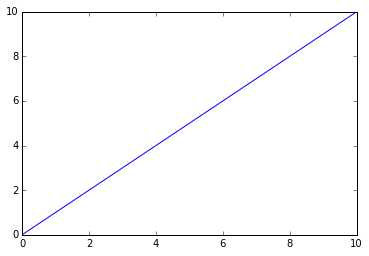

In [30]:
from scipy import interpolate
'''
# Create the array of points
x = np.linspace(-2, 2, 25)
# Choise such function
y = x**4 - 3*x**2 + 3
# Build the plot for this function
plt.plot(x, y)
plt.show()

# Create a smaller linspace
x1 = np.linspace(-2, 2, 10)
y1 = x1**4 - 3*x1**2 + 3
# Linear interpolation
# (all available kinds of interpolation you may find here)
fl = interpolate.interp1d(x1, y1, kind='linear')

plt.plot(x,y)# The main plot
plt.plot(x, fl(x), 'o--')# Interpolated line
plt.plot(x1, y1, 'x', markersize=16)# Points used for interpolation
plt.show()
'''
# type your code here
x = np.linspace(0, 10, 10)
y = x

fl = interpolate.interp1d(x, y, kind='linear')
fq = interpolate.interp1d(x, y, kind='quadratic')
fc = interpolate.interp1d(x, y, kind='cubic')

x_new = np.sin(x)

plt.plot(x, y)
plt.plot(x, fl, 'o--')
plt.plot(x, fq)
plt.plot(x, fc)
plt.show()


#plt.show()

In [31]:
from test_helper import Test

Test.assertEqualsHashed(x_new, 'af1f0b24733b09239c8bbe9fc76ad19aa21fb4d4', 'Incorrect content of "x_new" numpy array', 
                        'Exercise 2.1.1 is successful')
Test.assertEqualsHashed(fl(x_new), '0733d71f0eb4547bd00700d85361938f4093e2d8', 'Incorrect content of "fl" numpy array', 
                        'Exercise 2.1.2 is successful')
Test.assertEqualsHashed(fq(x_new), '97f117aa13a5eb095558114be60f1a186d498306', 'Incorrect content of "fq" numpy array', 
                        'Exercise 2.1.3 is successful')
Test.assertEqualsHashed(fc(x_new), 'df3aae12687319a3eab2cc6942ff79eb03486f3f', 'Incorrect content of "fc" numpy array', 
                        'Exercise 2.1.4 is successful')

1 test failed. Incorrect content of "x_new" numpy array


ValueError: A value in x_new is below the interpolation range.

### Control over axis appearance

[[back to top]](#Table-of-Contents)

The appearance of the axes is an important aspect of a figure that we often need to modify to make a publication quality graphics. We need to be able to control where the ticks and labels are placed, modify the font size and possibly the labels used on the axes. In this section we will look at controling those properties in a matplotlib figure.

#### Plot range

The first thing we might want to configure is the ranges of the axes. We can do this using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatrically getting "tightly fitted" axes ranges:

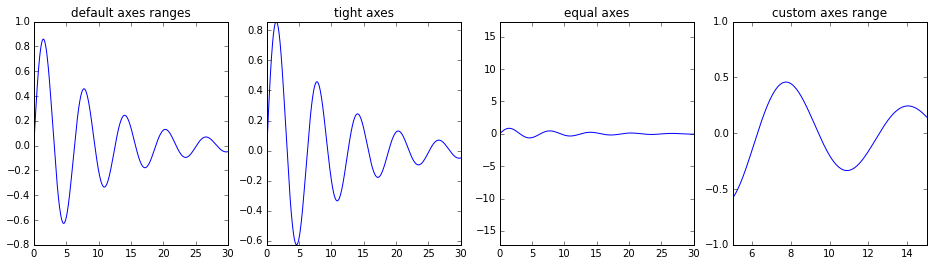

In [32]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

x = np.linspace(0, 30, 500)
y = np.sin(x) * np.exp(-x/10)

axes[0].plot(x, y)
axes[0].set_title("default axes ranges")

axes[1].plot(x, y)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, y)
axes[2].axis('equal')
axes[2].set_title("equal axes")

axes[3].plot(x, y)
axes[3].set_ylim([-1, 1])
axes[3].set_xlim([5, 15])
axes[3].set_title("custom axes range");

#### Logarithmic scale

It is also possible to set a logarithmic scale for one or both axes. This functionality is in fact only one application of a more general transformation system in Matplotlib. Each of the axes' scales are set seperately using `set_xscale` and `set_yscale` methods which accept one parameter (with the value "log" in this case):

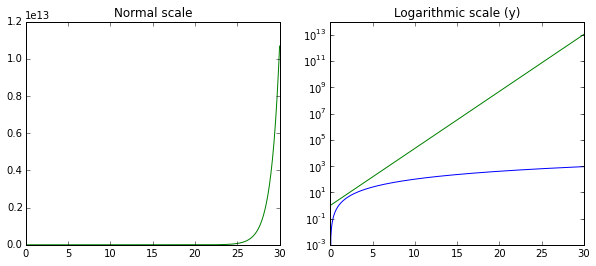

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");

### Placement of ticks and custom tick labels

[[back to top]](#Table-of-Contents)

We can explicitly determine where we want the axis ticks with `set_xticks` and `set_yticks`, which both take a list of values for where on the axis the ticks are to be placed. We can also use the `set_xticklabels` and `set_yticklabels` methods to provide a list of custom text labels for each tick location:

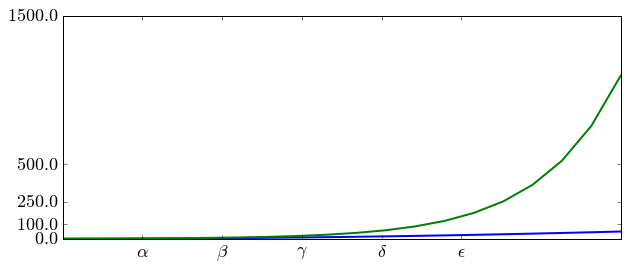

In [34]:
fig, ax = plt.subplots(figsize=(10, 4))

x = np.linspace(0, 7, 20)

ax.plot(x, x**2, x, np.exp(x), lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 100, 250, 500, 1500]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); # use LaTeX formatted labels

plt.show()

There are a number of more advanced methods for controlling major and minor tick placement in matplotlib figures, such as automatic placement according to different policies. See http://matplotlib.org/api/ticker_api.html for details.

### Axis number and axis label spacing

[[back to top]](#Table-of-Contents)

Unfortunately, when saving figures the labels are sometimes clipped, and it can be necessary to adjust the positions of axes a little bit. This can be done using `subplots_adjust`:

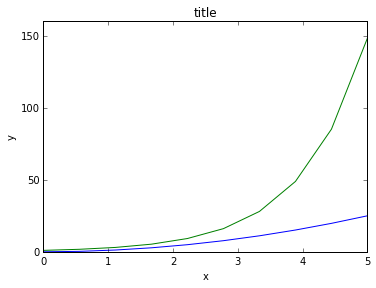

In [36]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(0, 5, 10)

ax.plot(x, x**2, x, np.exp(x))
ax.set_yticks([0, 50, 100, 150])

ax.set_title("title")
ax.set_xlabel("x")
ax.set_ylabel("y")

fig.subplots_adjust(left=0.15, right=.9, bottom=0.1, top=0.9);

`matplotlib.ticker` module contains classes to support completely configurable tick locating and formatting. `set_major_locator` methods provides a specific location of tick labels.

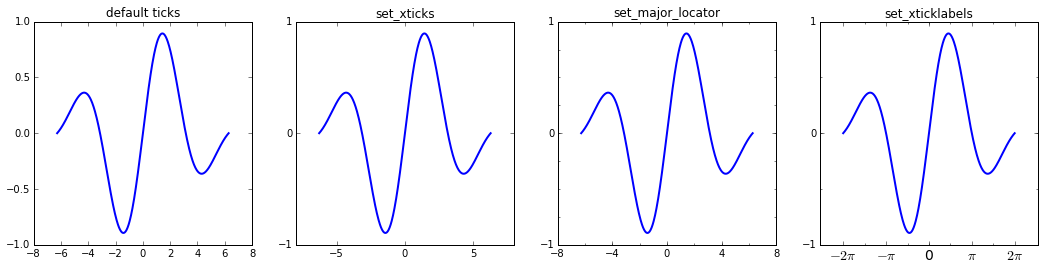

In [37]:
from matplotlib import ticker

x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x**2/20)

fig, axes = plt.subplots(1, 4, figsize=(18, 4))

axes[0].plot(x, y, lw=2)
axes[0].set_title("default ticks")

axes[1].plot(x, y, lw=2)
axes[1].set_yticks([-1, 0, 1])
axes[1].set_xticks([-5, 0, 5])
axes[1].set_title("set_xticks")

axes[2].plot(x, y, lw=2)
# Set how many text labels we want to show (4) discluding 0
axes[2].xaxis.set_major_locator(ticker.MaxNLocator(4)) 
axes[2].yaxis.set_major_locator(ticker.FixedLocator([-1, 0, 1]))
# Set how many ticks without text we want to show
axes[2].xaxis.set_minor_locator(ticker.MaxNLocator(8))
axes[2].yaxis.set_minor_locator(ticker.MaxNLocator(8))
axes[2].set_title("set_major_locator")

axes[3].plot(x, y, lw=2)
axes[3].set_yticks([-1, 0, 1])
axes[3].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
axes[3].set_xticklabels(['$-2\pi$', '$-\pi$', 0, r'$\pi$', r'$2\pi$'], size=14)
axes[3].xaxis.set_minor_locator(ticker.FixedLocator([-3 * np.pi / 2, -np.pi/2, 0, np.pi/2, 3 * np.pi/2]))
axes[3].yaxis.set_minor_locator(ticker.MaxNLocator(4))
axes[3].set_title("set_xticklabels")

plt.show()

### Axis grid

[[back to top]](#Table-of-Contents)

With the `grid` method in the axis object, we can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function:

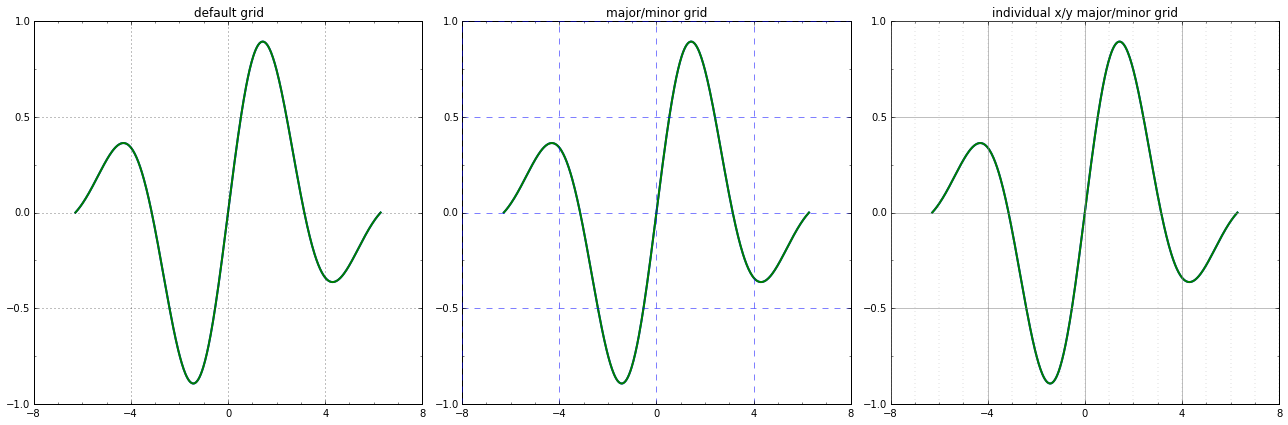

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(18,6))

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))

# Default grid appearance
axes[0].plot(x, y, lw=2)
axes[0].set_title("default grid")
axes[0].grid(True)

# Custom grid appearance
axes[1].plot(x, y, lw=2)
axes[1].set_title("major/minor grid")
axes[1].grid(color='b', alpha=0.5, linestyle='dashed', linewidth=1)

axes[2].plot(x, y, lw=2)
axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.5)
axes[2].grid(color="grey", which="minor", axis='x', linestyle=':', linewidth=0.25)
axes[2].grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.5)

fig.tight_layout()

### Axis spines

[[back to top]](#Table-of-Contents)

We can also change the properties of axis spines:

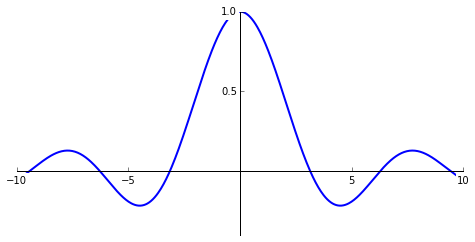

In [39]:
x = np.linspace(-10, 10, 500)
y = np.sin(x) / x

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, linewidth=2)

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
    
ax.set_xticks([-10, -5, 5, 10])
ax.set_yticks([0.5, 1])

# give each label a solid background of white, to not overlap with the plot line
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_bbox({'facecolor': 'white', 'edgecolor': 'white'})

### Twin axes

[[back to top]](#Table-of-Contents)

Sometimes it is useful to have dual x or y axes in a figure; for example, when plotting curves with different units together. Matplotlib supports this with the `twinx` and `twiny` functions:

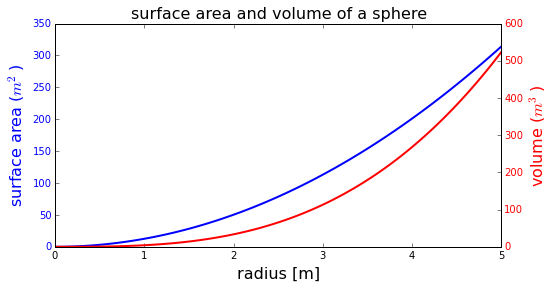

In [40]:
fig, ax1 = plt.subplots(figsize=(8, 4))

r = np.linspace(0, 5, 100)
a = 4 * np.pi * r ** 2  # area
v = (4 * np.pi / 3) * r ** 3  # volume


ax1.set_title("surface area and volume of a sphere", fontsize=16)
ax1.set_xlabel("radius [m]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"surface area ($m^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"volume ($m^3$)", fontsize=16, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

### Axes where `x` and `y` is zero

[[back to top]](#Table-of-Contents)

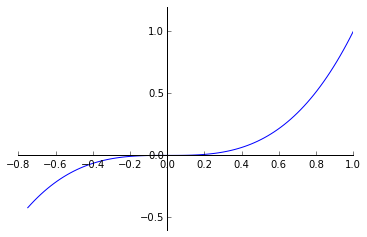

In [41]:
fig, ax = plt.subplots()

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0)) # set position of x spine to x=0

ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))   # set position of y spine to y=0

xx = np.linspace(-0.75, 1., 100)
ax.plot(xx, xx**3);

### Other 2D plot styles

[[back to top]](#Table-of-Contents)

In addition to the regular `plot` method, there are a number of other functions for generating different kind of plots. See the matplotlib plot gallery for a complete list of available plot types: http://matplotlib.org/gallery.html. Some of the more useful ones are show below:

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


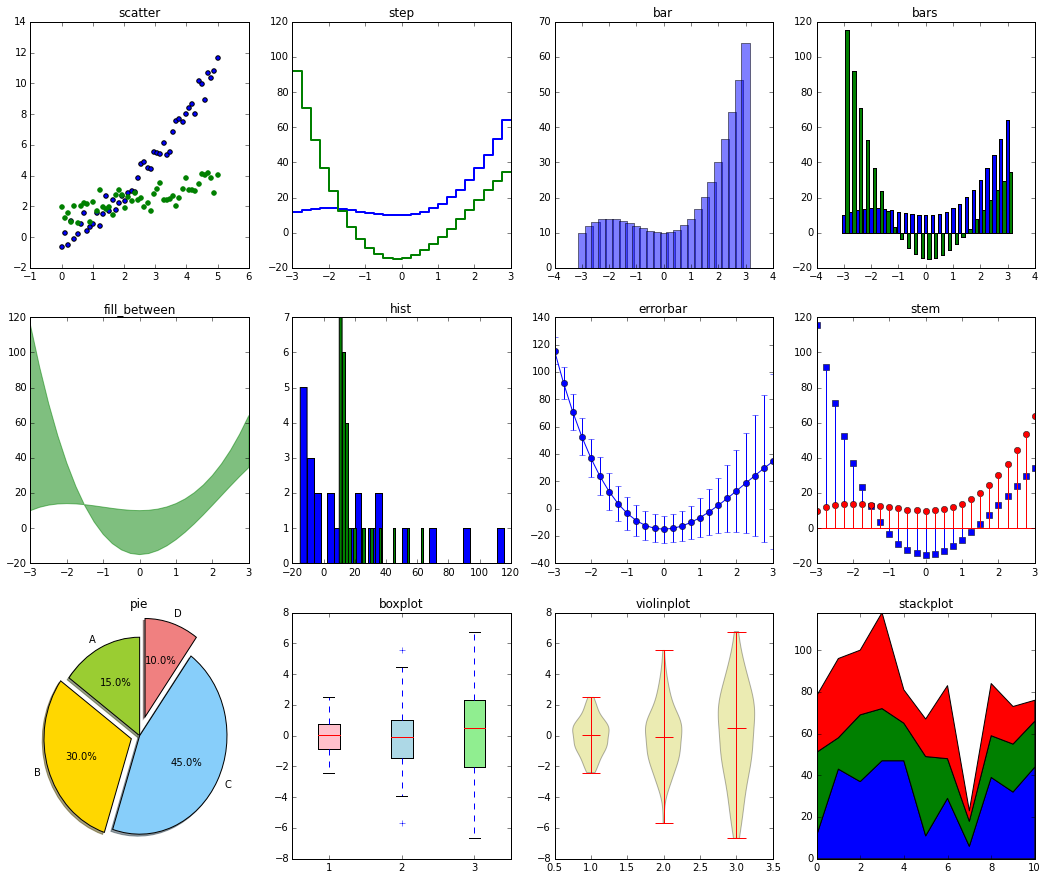

In [42]:
fig, axes = plt.subplots(3, 4, figsize=(18,15))

x = np.linspace(-3, 3, 25)
y1 = x**3+ 3 * x**2 + 10
y2 = -1.5 * x**3 + 10*x**2 - 15
xx = np.linspace(0, 5, 50)

# Scatter plot
axes[0,0].scatter(xx, -1 + xx + 0.25 * xx**2 + 2 * np.random.rand(len(xx)))
axes[0,0].scatter(xx, np.sqrt(xx) + 2 * np.random.rand(len(xx)), color="green")
axes[0,0].set_title("scatter")

# Step plot
axes[0,1].step(x, y1, x, y2, lw=2)
axes[0,1].set_title("step")

# Bar chart
axes[0,2].bar(x, y1, align="center", width=0.3, alpha=0.5)
axes[0,2].set_title("bar")

# Bar plot combination
width = 6/50.0
axes[0,3].bar(x - width/2, y1, width=width, color="blue")
axes[0,3].bar(x + width/2, y2, width=width, color="green")
axes[0,3].set_title("bars")

# Plot with filled area between two lines
axes[1,0].fill_between(x, y1, y2, color="green", alpha=0.5);
axes[1,0].set_title("fill_between");

# Histogramm
axes[1,1].hist(y2, bins=30)
axes[1,1].hist(y1, bins=30)
axes[1,1].set_title("hist")

# Plot with errors
axes[1,2].errorbar(x, y2, yerr=y1, fmt='o-')
axes[1,2].set_title("errorbar")

# Stem plot
axes[1,3].stem(x, y2, 'b', markerfmt='bs')
axes[1,3].stem(x, y1, 'r', markerfmt='ro')
axes[1,3].set_title("stem")

# Pie chart
labels = ['A', 'B', 'C', 'D']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0.2) 

axes[2,0].pie(sizes, explode=explode, labels=labels, colors=colors,
              autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
axes[2,0].set_title("pie")

# Rectangular box plot
err = [np.random.normal(0, std, 100) for std in range(1, 4)]
b = axes[2,1].boxplot(err,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color
axes[2,1].set_title("boxplot")
for patch, color in zip(b['boxes'], ('pink', 'lightblue', 'lightgreen')):
        patch.set_facecolor(color)
        
# Violinplot
axes[2,2].violinplot(err,
                     showmeans=False,
                     showmedians=True)
axes[2,2].set_title("violinplot")

# Stacked plot
def f():
    return np.random.randint(5, 50, 11)

x = np.arange(11)
y1, y2, y3 = f(), f(), f()

axes[2,3].stackplot(x, y1, y2, y3)
axes[2,3].axis('tight')
axes[2,3].set_xlim([0, 10])
axes[2,3].set_title("stackplot")

plt.show()

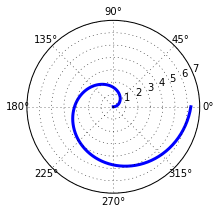

In [43]:
# Polar plot using add_axes and polar projection
fig = plt.figure()
ax = fig.add_axes([0.0, 0.0, .6, .6], polar=True)
t = np.linspace(0, 2 * np.pi, 100)
ax.plot(t, t, color='blue', lw=3)

plt.show()

### Text annotation

[[back to top]](#Table-of-Contents)

Annotating text in matplotlib figures can be done using the `text` function. It supports LaTeX formatting just like axis label texts and titles:

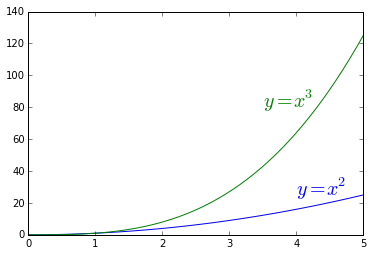

In [44]:
fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)

ax.text(4, 25, r"$y=x^2$", fontsize=20, color="blue")
ax.text(3.5, 80, r"$y=x^3$", fontsize=20, color="green")

plt.show()

> ### Exercise 2.2:

> Usually the measured values in science or social investigations contain noises. They can be associated with advices, technology of measurement, people who make measurement, etc. That's why it is very important to minimize the impact of these noises to the formation of the function, which describes the process or phenomenon.

> Before starting seed the random number generator with a fixed value `np.random.seed(42)`. This way, you'll always get the same random number sequence. It is necessary to check the correctness of this task.

> Create an NumPy array of random numbers `X = np.random.rand(200)` and define 200 points distributed by the normal (Gaussian) distribution that will correspond to the noise. It can be done using [`np.random.normal`](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.random.normal.html) function with `loc = 0` and `size = 0.1`: `noise = np.random.normal(0, 0.1, 200)`. 

> In this exercise you need to draw the scatter plot for two functions `Y1 = 0.5*X - 2*noise` and `Y2 = -2*X + 2*noise + 0.5` using `scatter` function of `matplotlib` library. Set for the `Y1` function the following parameters `s=50` (marker size), `c="red"` (marker color), `alpha=0.5` (marker opacity), marker is circle. For the `Y2` function `c="green"`, all other attributes are as before. Pay attention that you should draw at first scatter plot for the `Y1` function. It is important for checking the build plot. 

> After all above steps you should get the scatter plot with points of two colors. 

> Let's define the interpolate line using [`numpy.polifit`](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.polyfit.html) function that approximates distributed points with polinomial function and returns a vector of polinom coefficients that minimises the squared error. We will approximate our distributions with linear polinom. The `np.polyfit(X, Y1, 1)` corresponds to this line. This function returns two number `k` and `b` (in the same order) that are coeffients int the equation of the line `y = k*x + b`. Based on these coefficients for `Y1` and `Y2` functions you need to add to the previous plot to lines (blue color for the `Y1` interpolate line and magenta color for the `Y2` interpolate line).

> Now you should get just two intersected lines. 

> Calculate the cordinates of the point of its intersection (write its values to `x0` and `y0` variables). It can be done with the help of [Cramer's rules](https://en.wikipedia.org/wiki/Cramer%27s_rule). Add this point to the above plot as marker with parameters `marker="x"`, `c="blue"`, `markersize=20`, `markeredgewidth=3`. 

> Add the default grid to the plot, set x axis ranges from 0 to 1 and also add legend containg interpolating lines, point of its intersection  and scatter points (in the same order) to the plot. Set `figsize=(15, 10)`. Save the figure as "lab3_1_ex_6.png" image.

> The resulting plot should look like 

> <img src="images/ex_6.png">

In [ ]:
#np.random.seed(42)
# Normal distribution
#noise = np.random.normal(0, 0.1, 200)

#X = np.random.rand(200)
#Y1 = 0.5*X - 2*noise
#Y2 = -2*X + 2*noise + 0.5

# type your code here

# x0 = ...
# y0 = ...

#plt.savefig("lab3_1_ex_6.png")
#plt.show()

In [ ]:
Test.assertEqualsHashed((float(x0), float(y0)), '020e75002bd7c09ad34d4a84cf2e56a574efdd0b', 
                                  'Incorrect value of "x0" or "y0" variables', "Exercise 2.2.1 is successful")
Test.assertEqualsImagesHashed("lab3_1_ex_6.png", '014039018c396113', 'RGBA', (1080, 720),
                              'Incorrect plot image', "Exercise 2.2.2 is successful")

### Colormap and contour figures

[[back to top]](#Table-of-Contents)

Colormaps and contour figures are useful for plotting functions of two variables. In most of these functions we will use a colormap to encode one dimension of the data. There are a number of predefined colormaps. It is relatively straightforward to define custom colormaps. For a list of pre-defined colormaps, see: http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps

In [ ]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

In [ ]:
phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

#### pcolor

In [ ]:
fig, ax = plt.subplots()

p = ax.pcolor(X/(2*np.pi), Y/(2*np.pi), Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)

#### imshow

In [ ]:
fig, ax = plt.subplots()

im = ax.imshow(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])
im.set_interpolation('bilinear')

cb = fig.colorbar(im, ax=ax)

#### contour

In [ ]:
fig, ax = plt.subplots()

cnt = ax.contour(Z, cmap=matplotlib.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max(), extent=[0, 1, 0, 1])

## 3D figures

[[back to top]](#Table-of-Contents)

To use 3D graphics in matplotlib, we first need to create an instance of the `Axes3D` class. 3D axes can be added to a matplotlib figure canvas in exactly the same way as 2D axes; or, more conveniently, by passing a `projection='3d'` keyword argument to the `add_axes` or `add_subplot` methods.

In [ ]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

#### Surface plots

In [ ]:
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)

#### Wire-frame plot

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1, 1, 1, projection='3d')

p = ax.plot_wireframe(X, Y, Z, rstride=4, cstride=4)

#### Coutour plots with projections

In [ ]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(1,1,1, projection='3d')

ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
cset = ax.contour(X, Y, Z, zdir='z', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-np.pi, cmap=matplotlib.cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=3*np.pi, cmap=matplotlib.cm.coolwarm)

ax.set_xlim3d(-np.pi, 2*np.pi);
ax.set_ylim3d(0, 3*np.pi);
ax.set_zlim3d(-np.pi, 2*np.pi);

#### Change the view angle

We can change the perspective of a 3D plot using the `view_init` method, which takes two arguments: `elevation` and `azimuth` angle (in degrees):

In [ ]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(30, 45)

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.25)
ax.view_init(70, 30)

fig.tight_layout()

<center><h3>Presented by <a target="_blank" rel="noopener noreferrer nofollow" href="http://datascience-school.com">datascience-school.com</a></h3></center>